In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1d linear interpolation

In [5]:


def find_upper_lower_limits(xold, yold, xnew,sort_inputs=False):
    # upper and lower limits
    xupper  =[]
    xlower  =[]
    ylower  =[]
    yupper  =[]
    if sort_inputs: 
        indx= np.argsort(xold)
        xold = xold[indx]
        yold = yold[indx]

    
    for i,x in enumerate(xnew): 
        masklower = xold<=x
        imax = np.argmax(xold[masklower])
        xlower.append(xold[masklower][imax])
        ylower.append(yold[masklower][imax])

        maskupper = x<=xold
        imin = np.argmin(xold[maskupper])
        xupper.append(xold[maskupper][imin])
        yupper.append(yold[maskupper][imin])

    xupper  = np.array(xupper)
    xlower  = np.array(xlower)
    yupper  = np.array(yupper)
    ylower  = np.array(ylower)
    mask = xupper == xlower 
    xupper[mask]= xlower[mask]+1
    yupper[mask]= 0
    
    return xlower , xupper  , ylower , yupper

    
def interp_1D(xold, yold, xnew,sort_inputs=False):
    if xnew.max()>xold.max() or xnew.min() < xold.min():
        print("Error, Xnew must be inside Xold")
    xlower , xupper  , ylower , yupper = find_upper_lower_limits(xold, yold, xnew,sort_inputs)

    # (Y-Yl)/(x-xl) = (Yu-Yl)/(xu-xl) 
    # xd = (x-xl)/(xu-xl) ==> Y=xd (Yu-Yl) + Yl
    # Y = (1-xd) Yl + xd Yu
    xd = (xnew -xlower)/(xupper -xlower)
    ynew = (1-xd)*ylower+xd*yupper
    return ynew

[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]
CPU times: total: 15.6 ms
Wall time: 3.08 ms


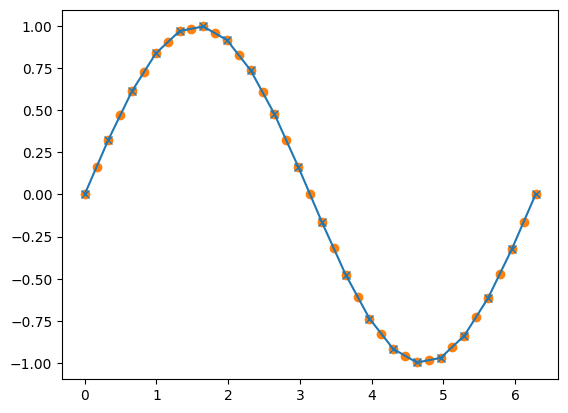

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
CPU times: total: 0 ns
Wall time: 1.34 ms


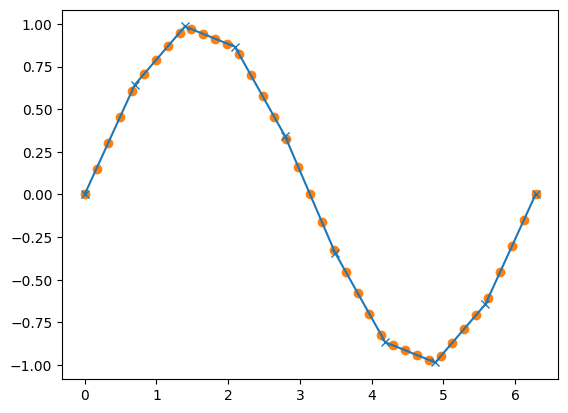

In [6]:
xold = np.linspace(0,2*np.pi,20)
print(xold)
yold = np.sin(xold)
#plt.plot(xold,yold, marker="o")



xnew= np.linspace(0,2*np.pi,40-1)
np.random.seed(0)
np.random.shuffle(xnew)
%time ynew = interp_1D(xold, yold, xnew)
plt.plot(xold,yold, marker="x")
plt.scatter(xnew, ynew,c="C1")


plt.show()

xold = np.linspace(0,2*np.pi,10)
print(xold)
yold = np.sin(xold)
#plt.plot(xold,yold, marker="o")



xnew= np.linspace(0,2*np.pi,40-1)
np.random.seed(0)
np.random.shuffle(xnew)
%time ynew = interp_1D(xold, yold, xnew)
plt.plot(xold,yold, marker="x")
plt.scatter(xnew, ynew,c="C1")

[3.44829694 4.49366732 3.78727399 3.42360201 2.66190161 4.0582724
 2.74944154 5.60317502 6.0548717  2.40923412 4.97455513 3.32314479
 3.56912924 5.8156952  0.44633272 0.54744954 0.12703594 5.23150478
 4.88930306 5.46644755]
CPU times: total: 31.2 ms
Wall time: 4.67 ms


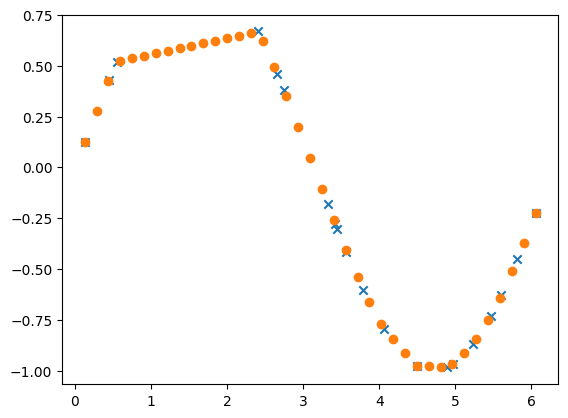

[1.07385659 2.25033643 4.71670013 3.81911273 2.04233197 0.24143408
 3.98526144 6.02525595 4.10160253 3.99019258]
CPU times: total: 0 ns
Wall time: 1.01 ms


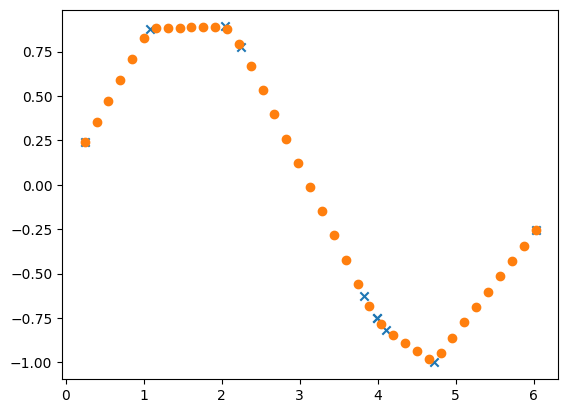

In [7]:
np.random.seed(0)
xold = np.random.uniform(0,2*np.pi,20)
print(xold)
yold = np.sin(xold)
#plt.plot(xold,yold, marker="o")



xnew= np.linspace(xold.min(),xold.max(),40-1)

np.random.shuffle(xnew)
%time ynew = interp_1D(xold, yold, xnew,sort_inputs=True)
plt.scatter(xold,yold, marker="x")
plt.scatter(xnew, ynew,c="C1")


plt.show()

xold = np.random.uniform(0,2*np.pi,10)
print(xold)
yold = np.sin(xold)
#plt.plot(xold,yold, marker="o")



xnew= np.linspace(xold.min(),xold.max(),40-1)
np.random.seed(0)
np.random.shuffle(xnew)
%time ynew = interp_1D(xold, yold, xnew,sort_inputs=True)
plt.scatter(xold,yold, marker="x")
plt.scatter(xnew, ynew,c="C1")

# 2d linear interpolation

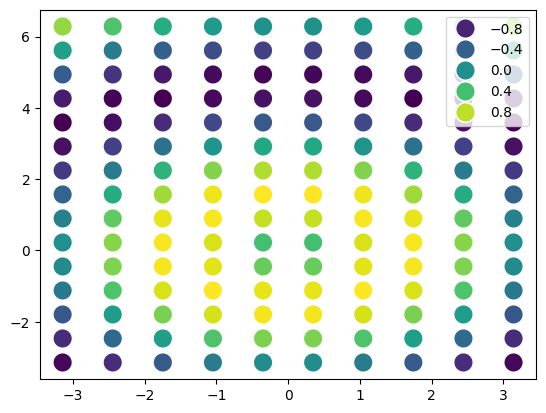

In [8]:
xold1=np.linspace(-np.pi,np.pi,10)
xold2=np.linspace(-np.pi,2*np.pi,15)


arr= []
for x1 in xold1: 
    row=[]
    for x2 in xold2:
        row.append([x1,x2])
    arr.append(row)
xold = np.array(arr)


xo, yo = xold[:,:,0].T, xold[:,:,1].T


zold = np.sin(np.sqrt(xo**2 + yo**2))
#zold =np.sin(2 * np.pi * xo)  +np.sin(3 * np.pi * yo)



xof= xo.flatten()
yof= yo.flatten()
zof= zold.flatten()
xof.shape, yof.shape, zof.shape


np.random.seed(0)
xnewf= np.random.uniform(xof.min(), xof.max(), len(xof)*100)
ynewf= np.random.uniform(yof.min(), yof.max(), len(yof)*100)


sns.scatterplot(x=xof, y=yof, hue=zof, palette="viridis", s=200)
plt.show()


In [9]:
1

1

In [10]:
# upper and lower limits
def find_upper_lower_limits2D(xold, yold, xnew,ynew, zold):
    xupper  =[]
    xlower  =[]
    ylower  =[]
    yupper  =[]
    zlower  =[]
    zupper  =[]
    
    
    for i in range(len(xnew)):
    
        x= xnew[i]
        y= ynew[i]
        
        masklower = (x>=xold) & (y>=yold)
        maskupper = (x<xold) & (y<yold)
        
        xlower.append(xold[masklower][-1])
        ylower.append(yold[masklower][-1])
        zlower.append(zold[masklower][-1])
        
        
        xupper.append(xold[maskupper][0])
        yupper.append(yold[maskupper][0])
        zupper.append(zold[maskupper][0])
    
    xlower  = np.array(xlower)
    ylower  = np.array(ylower)
    zlower  = np.array(zlower)
    
    xupper  = np.array(xupper)
    yupper  = np.array(yupper)
    zupper  = np.array(zupper)
    return  xlower , ylower , zlower , xupper , yupper  , zupper  
def interp_2D(xold, yold, xnew,ynew, zold): 
    
    xflower , yflower , zflower , xfupper , yfupper  , zfupper= \
    find_upper_lower_limits2D(xold, yold, xnew, ynew, zold)
        # Calculate normalized positions in x and y
    xd = (xnew - xflower) / (xfupper - xflower)
    yd = (ynew - yflower) / (yfupper - yflower)
    
    # Interpolate in the x-direction
    c00 = zflower * (1 - xd) + zfupper * xd
    c10 = zflower * (1 - xd) + zfupper * xd
    
    # Interpolate in the y-direction using c00 and c10
    znewf = c00 * (1 - yd) + c10 * yd
    return znewf
znewf=interp_2D(xof, yof, xnewf,ynewf, zof)

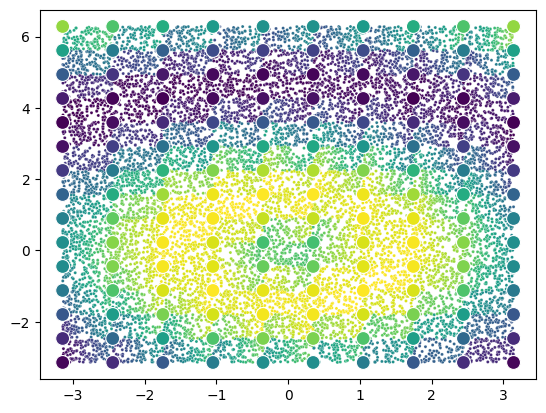

In [11]:
sns.scatterplot(x=xnewf, y=ynewf, hue=znewf, palette="viridis", 
                s=5, legend=None)
sns.scatterplot(x=xof, y=yof, hue=zof, palette="viridis", 
                s=100, legend=None)

plt.show()


In [12]:
xnewf2 = np.concatenate((xnewf, xof[:10]))
ynewf2 = np.concatenate((yof[:8], ynewf, yof[:2]))
len(xnewf2), len(ynewf2)
#znewf=interp_2D(xof, yof, xnewf2,ynewf2, zof)

(15010, 15010)

In [13]:
from copy import copy 
xnew, ynew , xold, yold= copy((xnewf2, ynewf2, xof, yof))
maskx = np.isin(xnew, xold)
masky = np.isin(ynew, yold)
maskx & masky

array([False, False, False, ..., False,  True,  True])

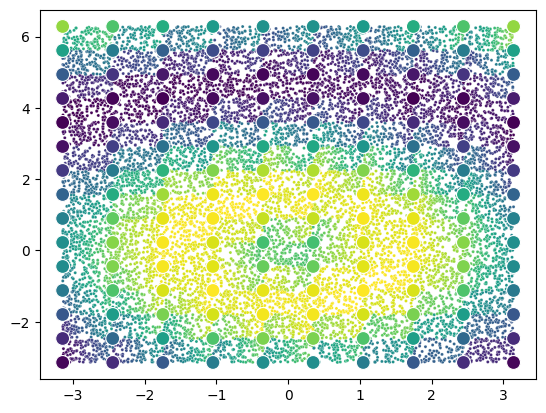

In [14]:
znewf=interp_2D(xof, yof, xnewf,ynewf, zof)

sns.scatterplot(x=xnewf, y=ynewf, hue=znewf, palette="viridis", 
                s=5, legend=None)
sns.scatterplot(x=xof, y=yof, hue=zof, palette="viridis", 
                s=100, legend=None)

plt.show()

# 3d linear interpolation

In [15]:
xold1=np.linspace(0,100,5) # soc
xold2=np.linspace(-15,40, 3) # temp
xold3=np.linspace(2,22,6) # p


arr= []
for x1 in xold1: 
    row=[]
    for x2 in xold2:
        col=[]
        for x3 in xold3:
            col.append([x1,x2,x3])
        row.append(col)
    arr.append(row)
xold = np.array(arr)


print(xold.shape)
xo, yo, zo = xold[:,:,:,0].T, xold[:,:,:,1].T,  xold[:,:,:,2].T

(5, 3, 6, 3)


In [16]:
np.linalg.norm(xo-yo)

533.3268228769298

In [17]:
print(np.unique(xo))
print(np.unique(yo))
print(np.unique(zo))

[  0.  25.  50.  75. 100.]
[-15.   12.5  40. ]
[ 2.  6. 10. 14. 18. 22.]


In [18]:
len(np.unique(zo))

6

In [19]:
np.unique(zo)

array([ 2.,  6., 10., 14., 18., 22.])

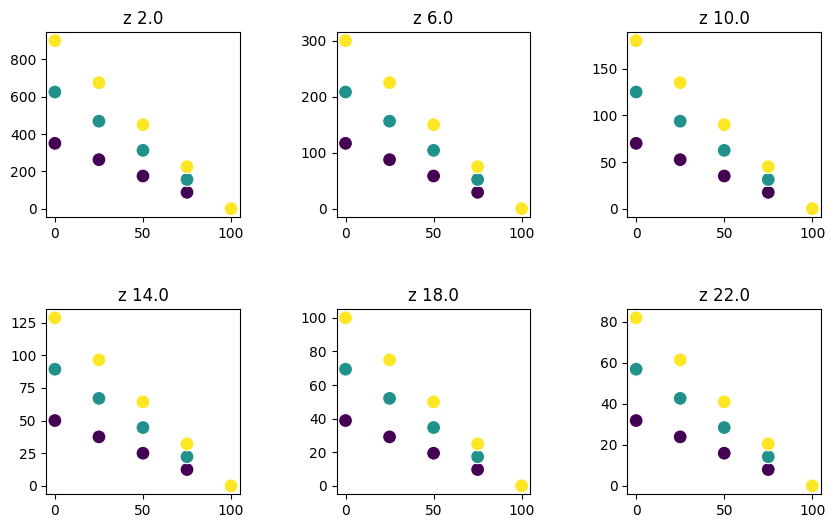

In [20]:
# Create a figure with subplots, set the figure size
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Adjust figsize as needed

# Flatten the axes for easy access
axes = axes.flatten()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Change 0.5 to your desired spacing


fold =0*xo

for z,axe in zip(np.unique(zo),axes): 
    mask  = zo ==z
    fold[mask]=10*(100-xo[mask])*(1+yo[mask]/50)*(1/z)
    
    sns.scatterplot(x=xo[mask], hue=yo[mask], y=fold[mask], palette="viridis", 
                    s=100, legend=None, ax = axe)
    axe.set_title("z "+str(z))


In [76]:
xof= xo.flatten()
yof= yo.flatten()
zof= zo.flatten()
fof=fold.flatten()

In [77]:
len(zof)

90

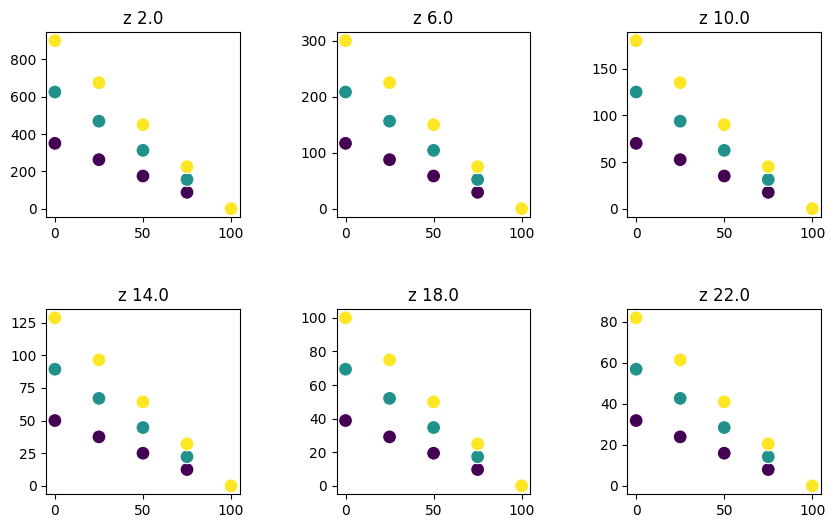

In [78]:
# Create a figure with subplots, set the figure size
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Adjust figsize as needed

# Flatten the axes for easy access
axes = axes.flatten()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Change 0.5 to your desired spacing




for z,axe in zip(np.unique(zof),axes): 
    mask  = zof ==z

    sns.scatterplot(x=xof[mask], hue=yof[mask], y=fof[mask], palette="viridis", 
                    s=100, legend=None, ax = axe)
    axe.set_title("z "+str(z))


In [79]:
# upper and lower limits
def find_upper_lower_limits3D(xold, yold,zold, xnew,ynew, znew, fold):
    xupper  =[]
    xlower  =[]
    ylower  =[]
    yupper  =[]
    zlower  =[]
    zupper  =[]

    c000,c001,c010,c011,c100,c101,c110,c111= [],[],[],[],[],[],[],[]
    
    
    for i in range(len(xnew)):
    
        x= xnew[i]
        y= ynew[i]
        z= znew[i]
        
        masklower = (x>=xold) & (y>=yold) & (z>=zold)
        maskupper = (x<xold) & (y<yold) & (z<zold)
        
        xlower.append(xold[masklower][-1])
        ylower.append(yold[masklower][-1])
        zlower.append(zold[masklower][-1])
        
        

        
        
        
        xupper.append(xold[maskupper][0])
        yupper.append(yold[maskupper][0])
        zupper.append(zold[maskupper][0])
        
        

        c100.append(fold[(x>=xold) & (y< yold) & (z< zold)][-1])
        c101.append(fold[(x>=xold) & (y< yold) & (z>=zold)][-1])
        c110.append(fold[(x>=xold) & (y>=yold) & (z< zold)][-1])
        c111.append(fold[(x>=xold) & (y>=yold) & (z>=zold)][-1])
        

        
        c000.append(fold[(x< xold) & (y< yold) & (z< zold)][0])
        c001.append(fold[(x< xold) & (y< yold) & (z>= zold)][0])
        c010.append(fold[(x< xold) & (y>= yold) & (z< zold)][0])
        c011.append(fold[(x< xold) & (y>= yold) & (z>= zold)][0])
    
    xlower  = np.array(xlower)
    ylower  = np.array(ylower)
    zlower  = np.array(zlower)

    
    xupper  = np.array(xupper)
    yupper  = np.array(yupper)
    zupper  = np.array(zupper)

    c000 = np.array(c000)
    c001 = np.array(c001)
    c010 = np.array(c010)
    c011 = np.array(c011)
    
    c100 = np.array(c100)
    c101 = np.array(c101)
    c110 = np.array(c110)
    c111 = np.array(c111)
    return  xlower , ylower , zlower , xupper , yupper  , zupper  ,  c000,c001,c010,c011,c100,c101,c110,c111


In [120]:
xnewf= np.random.uniform(xof.min(), xof.max(), len(xof) *10)
ynewf= np.random.uniform(yof.min(), yof.max(), len(yof) *10)
#znewf= np.random.uniform(zof.min(), zof.max(), len(zof) *10)
znewf = np.array(list(np.linspace(2.1,21.9,6))*(len(ynewf)//6))

In [121]:
len(znewf), len(zof)

(900, 90)

In [122]:
def interp_3D(xold, yold, zold,xnew,ynew, znew,fold): 
    
    xlower , ylower , zlower , xupper , yupper  , zupper  ,\
    c000,c001,c010,c011,c100,c101,c110,c111=\
    find_upper_lower_limits3D(xold, yold, zold,xnew,ynew, znew,fold)
        # Calculate normalized positions in x and y
    xd = (xnew - xlower) / (xupper - xlower)
    yd = (ynew - ylower) / (yupper - ylower)
    zd = (znew - zlower) / (zupper - zlower)
    
    # Interpolate in the x-direction
    c00 = c000 * (1 - xd) + c100 * xd
    c01 = c001 * (1 - xd) + c101 * xd
    c10 = c010 * (1 - xd) + c110 * xd
    c11 = c011 * (1 - xd) + c111 * xd
    
    
    c0 = c00*(1-yd) + c10*yd
    c1 = c01*(1-yd) + c11*yd
    
    c= c0*(1-zd) + c1*zd
    
    
    fnewf = c
    return fnewf


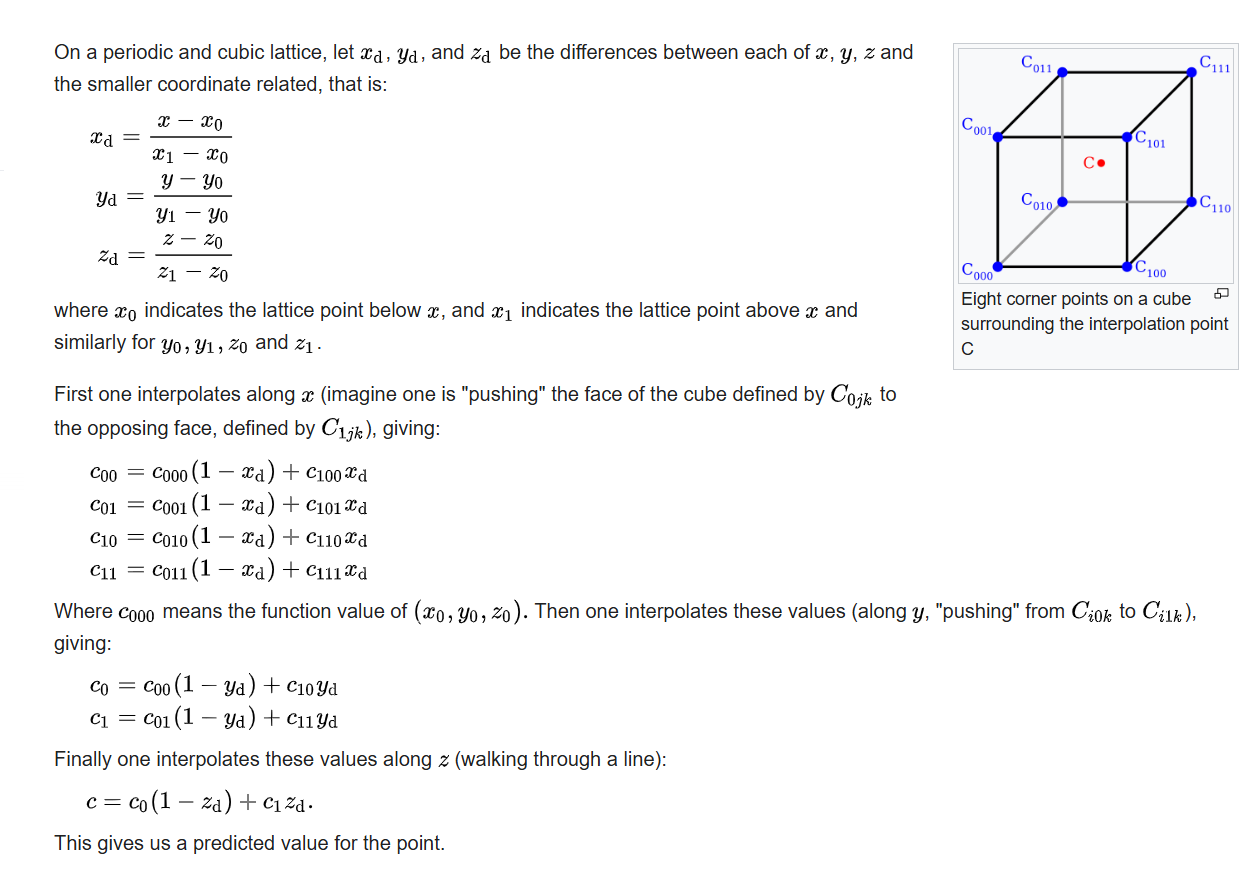

In [123]:
fnewf= interp_3D(xof, yof, zof,xnewf,ynewf, znewf,fof)

In [124]:
len(np.unique(znewf))

6

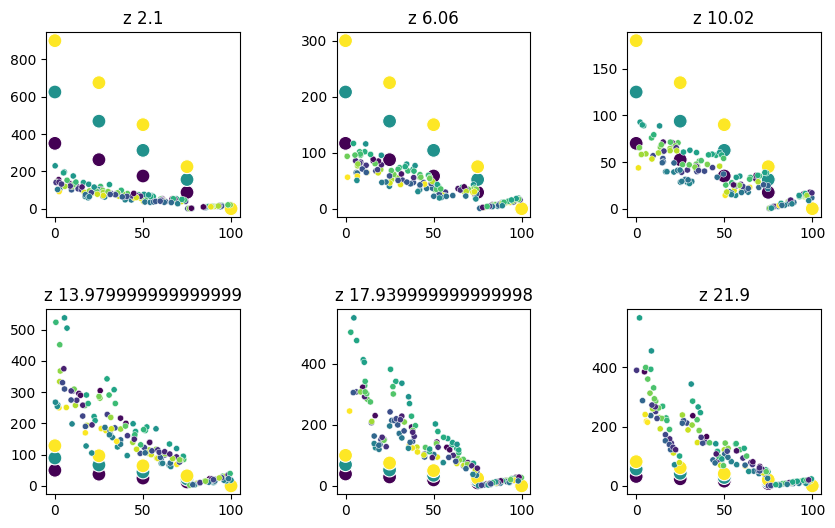

In [125]:
# Create a figure with subplots, set the figure size
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Adjust figsize as needed

# Flatten the axes for easy access
axes = axes.flatten()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Change 0.5 to your desired spacing


for z,axe in zip(np.unique(zof),axes): 
    mask  = zof ==z

    sns.scatterplot(x=xof[mask], hue=yof[mask], y=fof[mask], palette="viridis", 
                    s=100, legend=None, ax = axe)



for z,axe in zip(np.unique(znewf),axes): 
    mask  = znewf ==z

    sns.scatterplot(x=xnewf[mask], hue=ynewf[mask], y=fnewf[mask], palette="viridis", 
                    s=20, legend=None, ax = axe, )
    axe.set_title("z "+str(z))


    
    


# Cubic interpolation

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 



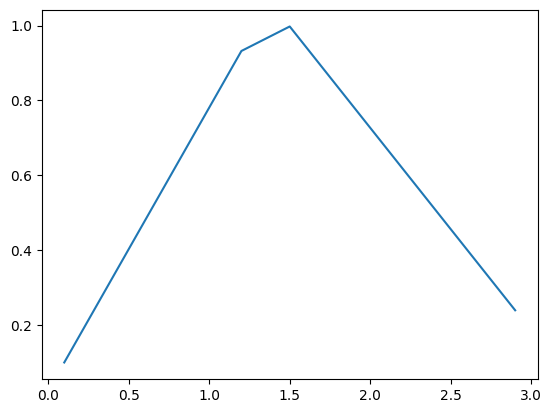

In [5]:
x_ns=np.array([0.1,1.2,1.5,2.9])
y_ns=np.sin(x_ns)
plt.plot(x_ns, y_ns)
x = 1.35

In [11]:
Ivec= np.repeat(1, len(x_ns))
X= np.array([x_ns**3, x_ns**2,x_ns,Ivec]).T
X

array([[1.0000e-03, 1.0000e-02, 1.0000e-01, 1.0000e+00],
       [1.7280e+00, 1.4400e+00, 1.2000e+00, 1.0000e+00],
       [3.3750e+00, 2.2500e+00, 1.5000e+00, 1.0000e+00],
       [2.4389e+01, 8.4100e+00, 2.9000e+00, 1.0000e+00]])

In [87]:
Y= y_ns.reshape((-1,1))
Y

array([[0.09983342],
       [0.93203909],
       [0.99749499],
       [0.23924933]])

In [88]:
X_1= np.linalg.inv(X)
X_1

array([[-0.23191095,  1.78253119, -1.70068027,  0.15006002],
       [ 1.2987013 , -8.02139037,  7.14285714, -0.42016807],
       [-2.23330241,  8.53832442, -6.61564626,  0.31062425],
       [ 1.21057514, -0.77540107,  0.59183673, -0.0270108 ]])

In [89]:
a, b, c , d = X_1.dot(Y)
X_1.dot(Y)

array([[-0.022282  ],
       [-0.3221563 ],
       [ 1.21033655],
       [-0.01795639]])

In [90]:
X_1.shape, Y.shape

((4, 4), (4, 1))

In [91]:
def cub (x): 
    _Ivec = np.repeat(1, len(x))
    return a*x**3+b*x**2+c*x+d#_Ivec*d


In [92]:
xnew = np.linspace(x_ns[0], x_ns[-1], 100)
ynew= cub(xnew)
ynew[:10]

array([0.09983342, 0.1319604 , 0.16355827, 0.194624  , 0.22515457,
       0.25514694, 0.2845981 , 0.31350502, 0.34186467, 0.36967403])

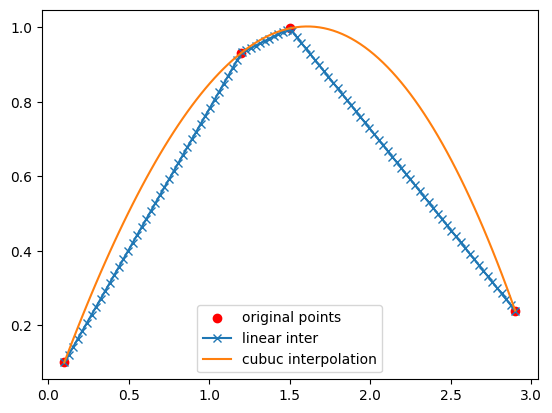

In [109]:
plt.scatter(x_ns, y_ns, c="red", label = "original points")
ylinearInterp= np.interp(xnew , x_ns, y_ns)
plt.plot(xnew, ylinearInterp, marker = "x", label = "linear inter")


plt.plot(xnew, ynew, label = "cubuc interpolation")
plt.legend()
plt.show()